Name: Kieran Fitzmaurice

# A Low-Pass Filter

(Adapted from textbook exercise 8.1)

Here is a simple electronic circuit with one resistor and one capacitor:

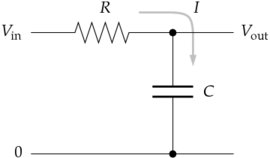

This circuit acts as a low-pass filter: you send a signal in on the left and it comes out filtered on the right.

Using Ohm's law and the capacitor law and assuming that the output load has very high impedance, so that a negligible amount of current flows through it, we can write down the equations governing this circuit as follows. Let $I$ be the current that flows through $R$ and into the capacitor, and let $Q$ be the charge on the capacitor. Then:
$$IR = V_\textrm{in} - V_\textrm{out}\,,\qquad Q = CV_\textrm{out}\,,\qquad I = \frac{dQ}{dt}\,.$$
Substituting the second equation into the third, then substituting the result into the first equation, we find that $V_\textrm{in} - V_\textrm{out} = RC\,(dV_\textrm{out}/dt)$, or equivalently
$$\frac{dV_\textrm{out}}{dt} = \frac{1}{RC}\bigl(V_\textrm{in} - V_\textrm{out} \bigr)\,.$$

- Write a program to solve this equation for $V_\textrm{out}(t)$ using the fourth-order Runge-Kutta method when the input signal is a square-wave with frequency 1 and amplitude 1:
$$V_\textrm{in}(t) = \begin{cases}
                     1  & \qquad\mbox{if $\lfloor 2t \rfloor$ is even,} \\
                     -1 & \qquad\mbox{if $\lfloor 2t \rfloor$ is odd,}
                   \end{cases}$$
where $\lfloor x\rfloor$ means $x$ rounded down to the next lowest integer. Use the program to make plots of the output of the filter circuit from $t=0$ to $t=10$ when $RC=0.01$, $0.1$, and 1, with initial condition $V_\textrm{out}(0)=0$. You will have to make a decision about what value of $h$ to use in your calculation. Small values give more accurate results, but the program will take longer to run. Try a variety of different values and choose one for your final calculations that seems sensible to you.

> A program similar to the one you wrote is running inside most stereos and music players, to create the effect of the "bass" control. In the old days, the bass control on a stereo would have been connected to a real electronic low-pass filter in the amplifier circuitry, but these days there is just a computer processor that simulates the behavior of the filter in a manner similar to your program.

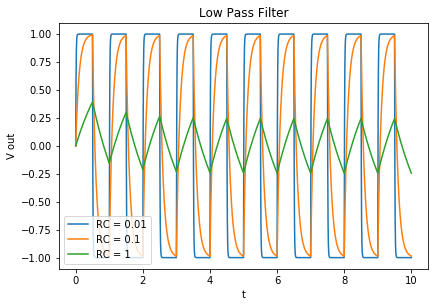

In [1]:
%reset -f

import numpy as np
import matplotlib.pyplot as plt

def RK4_step(f, x, t, h):
    """
    Given a function f(x,t) and
    scalars x, t, and h, return x(t+h)
    """
    k1 = h*f(x, t)
    k2 = h*f(x + k1/2, t + h/2)
    k3 = h*f(x + k2/2, t + h/2)
    k4 = h*f(x + k3, t + h)
    return x + (k1 + 2*k2 + 2*k3 + k4)/6

def f(Vout,t):

    if np.floor(2*t) % 2 == 0:
        Vin = 1
    else:
        Vin = -1
    
    fVout = 1/RC*(Vin-Vout)
    return(fVout)

def Low_Pass_Filter(Vo,tmin,tmax,h):
    Vout = Vo
    Vout_values = []

    t_values = np.arange(tmin,tmax,h)

    for t in t_values:
        Vout_values.append(Vout)
        r = (Vout,RC)
        Vout = RK4_step(f,Vout,t,h)
    
    return(t_values,Vout_values)


RC = 0.01
t1_values,Vout1_values = Low_Pass_Filter(0,0,10,0.001)
RC = 0.1
t2_values,Vout2_values = Low_Pass_Filter(0,0,10,0.001)
RC = 1
t3_values,Vout3_values = Low_Pass_Filter(0,0,10,0.001)

plt.plot(t1_values,Vout1_values,label = "RC = 0.01")
plt.plot(t2_values,Vout2_values,label = "RC = 0.1")
plt.plot(t3_values,Vout3_values,label = "RC = 1")
plt.legend()
plt.tight_layout()
plt.xlabel("t")
plt.ylabel("V out")
plt.title("Low Pass Filter")
plt.show()

- Based on the graphs produced by your program, describe what you see and explain what the circuit is doing.

**Your description here:** 

# The Lorenz Equations

(Adapted from textbook exercise 8.3)

One of the most celebrated sets of differential equations in physics is the Lorenz equations:
$$\frac{dx}{dt} = \sigma(y-x),\qquad \frac{dy}{dt} = rx - y - xz,\qquad \frac{dz}{dt} = xy - bz\,,$$
where $\sigma$, $r$, and $b$ are constants.

These equations were first studied by Edward Lorenz in 1963, who derived them from a simplified model of weather patterns. The reason for their fame is that they were one of the first incontrovertible examples of *deterministic chaos*, the occurrence of apparently random motion even though there is no randomness built into the equations.

- Write a program to solve the Lorenz equations for the case $\sigma=10$, $r=28$, and $b=\tfrac83$ in the range from $t=0$ to $t=50$ with initial conditions $(x,y,z)=(0,1,0)$. Have your program make a plot of $y$ as a function of time. Note the unpredictable nature of the motion.

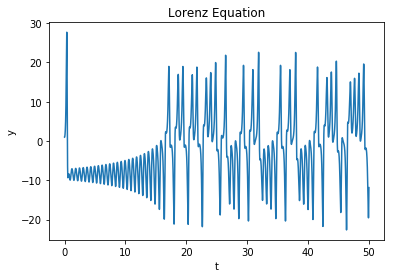

In [2]:
%reset -f

import numpy as np
import matplotlib.pyplot as plt

def RK4_step(f, x, t, h):
    """
    Given a function f(x,t) and
    scalars x, t, and h, return x(t+h)
    """
    k1 = h*f(x, t)
    k2 = h*f(x + k1/2, t + h/2)
    k3 = h*f(x + k2/2, t + h/2)
    k4 = h*f(x + k3, t + h)
    return x + (k1 + 2*k2 + 2*k3 + k4)/6

def f(r,t):
    x,y,z = r
    fx = sigma*(y-x)
    fy = R*x - y - x*z
    fz = x*y - b*z
    return np.array([fx,fy,fz])

#Initial Conditions
sigma = 10
R = 28
b = 8/3

x,y,z = 0,1,0

h = 0.001
t_values = np.arange(0,50,h)

x_values = []
y_values = []
z_values = []

for t in t_values:
    x_values.append(x)
    y_values.append(y)
    z_values.append(z)
    
    r = (x,y,z)
    x,y,z = RK4_step(f,r,t,h)

plt.plot(t_values,y_values)
plt.xlabel("t")
plt.ylabel("y")
plt.title("Lorenz Equation")
plt.show()


- Make a plot of $z$ against $x$. You should see a picture of the famous "strange attractor" of the Lorenz equations, a lop-sided butterfly-shaped plot that never repeats itself (you can find images of it online for comparison).

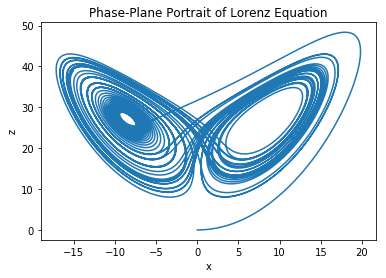

In [3]:
plt.plot(x_values,z_values)
plt.xlabel("x")
plt.ylabel("z")
plt.title("Phase-Plane Portrait of Lorenz Equation")
plt.show()

# Harmonic and Anharmonic Oscillators

(Adapted from textbook exercise 8.6)

The simple harmonic oscillator arises in many physical problems, in mechanics, electricity and magnetism, and condensed matter physics, among other areas. Consider the standard oscillator equation
$$\frac{d^2x}{dt^2} = -\omega^2 x\,.$$

- Turn this second-order equation into two coupled first-order equations, then write a program to solve them for the case $\omega=1$ in the range from $t=0$ to $t=50$. A second-order equation requires two initial conditions, one on $x$ and one on its derivative. For this problem use $x=1$ and $dx/dt = 0$ as initial conditions. Have your program make a graph showing the value of $x$ as a function of time.


- Also make a plot $dx/dt$ against $x$.  Such a plot is called a *phase space* plot.

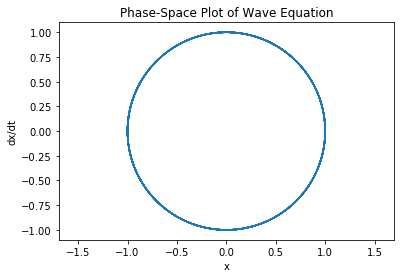

In [4]:
%reset -f

import numpy as np
import matplotlib.pyplot as plt

def RK4_step(f, x, t, h):
    """
    Given a function f(x,t) and
    scalars x, t, and h, return x(t+h)
    """
    k1 = h*f(x, t)
    k2 = h*f(x + k1/2, t + h/2)
    k3 = h*f(x + k2/2, t + h/2)
    k4 = h*f(x + k3, t + h)
    return x + (k1 + 2*k2 + 2*k3 + k4)/6

def f(r,t):
    x,v = r
    fx = v
    fv = x*-w**2
    return np.array([fx,fv])

#Initial Conditions
w = 1
x = 1
v = 0

h = 0.01
t_values = np.arange(0,50,h)

x_values = []
v_values = []

for t in t_values:
    x_values.append(x)
    v_values.append(v)
    r = x,v
    x,v = RK4_step(f,r,t,h)
    
plt.plot(x_values,v_values)
plt.xlabel("x")
plt.ylabel("dx/dt")
plt.title("Phase-Space Plot of Wave Equation")
plt.axis("equal")
plt.show()

- The *van der Pol oscillator*, which appears in electronic circuits and in laser physics, is described by the equation
$$\frac{d^2x}{dt^2} - \mu (1-x^2) \frac{dx}{dt} + \omega^2 x = 0\,.$$
Modify your program to solve this equation from $t=0$ to $t=20$ and hence make a set of plots for the van der Pol oscillator with $\omega=1$, $\mu=1$, and initial conditions $x=1$ and $dx/dt=0$. Try it also for $\mu=2$ and $\mu=4$ (still with $\omega=1$). Make sure you use a small enough value of the time interval $h$ to get a smooth, accurate phase space plot.

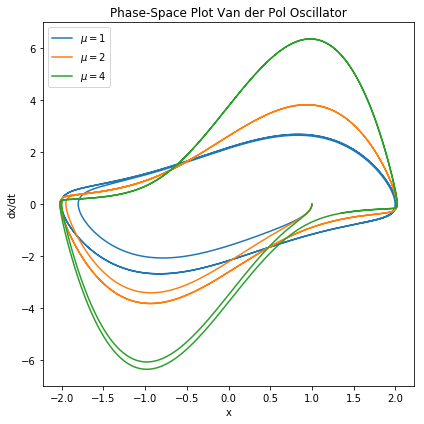

In [5]:
%reset -f

import numpy as np
import matplotlib.pyplot as plt

def RK4_step(f, x, t, h):
    """
    Given a function f(x,t) and
    scalars x, t, and h, return x(t+h)
    """
    k1 = h*f(x, t)
    k2 = h*f(x + k1/2, t + h/2)
    k3 = h*f(x + k2/2, t + h/2)
    k4 = h*f(x + k3, t + h)
    return x + (k1 + 2*k2 + 2*k3 + k4)/6

def f(r,t):
    x,v = r
    fx = v
    fv = meu*(1-x**2)*v - x*w**2
    return np.array([fx,fv])

def Van_der_Pol(r0,tmin,tmax,h):
    
    w,x,v = r0
    
    t_values = np.arange(tmin,tmax,h)
    x_values = []
    v_values = []

    for t in t_values:
        x_values.append(x)
        v_values.append(v)
        r = x,v
        x,v = RK4_step(f,r,t,h)
        
    return(t_values,x_values,v_values)

#Initial Conditions
w = 1
x = 1
v = 0

r0 = (w,x,v)

meu = 1
t1_vals,x1_vals,v1_vals = Van_der_Pol(r0,0,20,0.001)
meu = 2
t2_vals,x2_vals,v2_vals = Van_der_Pol(r0,0,20,0.001)
meu = 4
t3_vals,x3_vals,v3_vals = Van_der_Pol(r0,0,20,0.001)

fig = plt.figure(figsize = (6,6)) 
plt.plot(x1_vals,v1_vals,label = "$\mu = 1$")
plt.plot(x2_vals,v2_vals,label = "$\mu = 2$")
plt.plot(x3_vals,v3_vals,label = "$\mu = 4$")
plt.xlabel("x")
plt.ylabel("dx/dt")
plt.title("Phase-Space Plot Van der Pol Oscillator")
plt.legend()

plt.tight_layout()
plt.show()

# Cometary Orbits

(Adapted from textbook exercise 8.10)

Many comets travel in highly elongated orbits around the Sun. For much of their lives they are far out in the solar system, moving very slowly, but on rare occasions their orbit brings them close to the Sun for a fly-by and for a brief period of time they move very fast indeed:

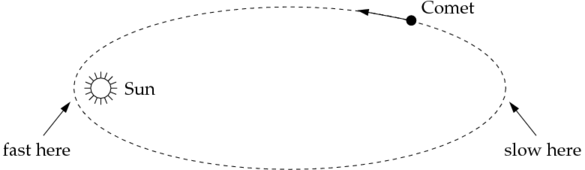

This is a classic example of a system for which an adaptive step size method is useful, because for the large periods of time when the comet is moving slowly we can use long time-steps, so that the program runs quickly, but short time-steps are crucial in the brief but fast-moving period close to the Sun.

The differential equation obeyed by a comet is straightforward to derive.  The force between the Sun, with mass $M=1.9891\times10^{30}$ kg at the origin, and a comet of mass $m$ with position vector $\vec{r}$ is $GMm/r^2$ in direction $-\vec{r}/r$ (i.e., the direction towards the Sun), and hence Newton's second law tells us that
$$m \frac{d^2\vec{r}}{dt^2} = -\biggl({GMm\over r^2}\biggr)\,\frac{\vec{r}}{r}\,,$$
where $G=6.6738\times10^{-11}$ m$^3$kg$^{-1}$s$^{-2}$. Canceling the $m$ and taking the $x$ component we have
$$\frac{d^2x}{dt^2} = -GM \frac{x}{r^3}\,,$$
and similarly for the other two coordinates. We can, however, throw out one of the coordinates because the comet stays in a single plane as it orbits. If we orient our axes so that this plane is perpendicular to the $z$-axis, we can forget about the $z$ coordinate and we are left with just two second-order equations to solve:
$$\frac{d^2x}{dt^2} = -GM \frac{x}{r^3}\,, \qquad \frac{d^2y}{dt^2} = -GM \frac{y}{r^3}\,,$$
where $r=\sqrt{x^2+y^2}$.

- Turn these two second-order equations into four first-order equations, using the methods you have learned.


- Write a program to solve your equations using the fourth-order Runge-Kutta method with a *fixed* step size. As an initial condition, take a comet at coordinates $x=4$ billion kilometers and $y=0$ (which is somewhere out around the orbit of Neptune) with initial velocity $v_x=0$ and $v_y = 500$ m/s. Make a graph showing the trajectory of the comet (i.e., a plot of $y$ against $x$) for at least two full orbits of the comet. Since orbits are periodic, a good indicator of an accurate calculation is that successive orbits of the comet lie on top of one another on your plot. If they do not then you need a smaller value of step size $h$.
  

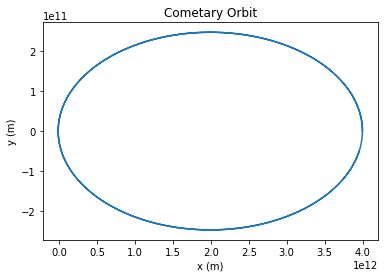

In [6]:
%reset -f

import numpy as np
import matplotlib.pyplot as plt

def RK4_step(f, x, t, h):
    """
    Given a function f(x,t) and
    scalars x, t, and h, return x(t+h)
    """
    k1 = h*f(x, t)
    k2 = h*f(x + k1/2, t + h/2)
    k3 = h*f(x + k2/2, t + h/2)
    k4 = h*f(x + k3, t + h)
    return x + (k1 + 2*k2 + 2*k3 + k4)/6

def f(r,t):
    x,y,vx,vy = r
    R = np.sqrt(x**2 + y**2)
    fx = vx
    fy = vy
    fvx = -G*M*x/R**3
    fvy = -G*M*y/R**3
    
    return np.array([fx,fy,fvx,fvy])

G = 6.6738e-11
M = 1.9891e30

#Initial Conditions
x = 4e12
y = 0
vx = 0
vy = 500

h = 2e4
t_values = np.arange(0,3e9,h)

x_values = []
y_values = []

for t in t_values:
    x_values.append(x)
    y_values.append(y)
    r = (x,y,vx,vy)
    x,y,vx,vy = RK4_step(f,r,t,h)
    
plt.plot(x_values,y_values)
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Cometary Orbit")
plt.show()

- Make a copy of your program and modify the copy to do the calculation using an adaptive step size. Set a target accuracy of $\delta=1$ kilometer per year in the position of the comet and again plot the trajectory.


- Make a plot like before, but this time, place dots on your graph showing the position of the comet at each Runge-Kutta step around a single orbit. You should see the steps getting closer together when the comet is close to the Sun and further apart when it is far out in the solar system.

/Users/kieranfitzmaurice/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:58: RuntimeWarning: divide by zero encountered in double_scalars


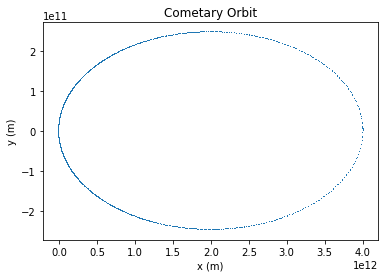

In [7]:
%reset -f

import numpy as np
import matplotlib.pyplot as plt

def RK4_step(f, x, t, h):
    """
    Given a function f(x,t) and
    scalars x, t, and h, return x(t+h)
    """
    k1 = h*f(x, t)
    k2 = h*f(x + k1/2, t + h/2)
    k3 = h*f(x + k2/2, t + h/2)
    k4 = h*f(x + k3, t + h)
    return x + (k1 + 2*k2 + 2*k3 + k4)/6

def f(r,t):
    x,y,vx,vy = r
    R = np.sqrt(x**2 + y**2)
    fx = vx
    fy = vy
    fvx = -G*M*x/R**3
    fvy = -G*M*y/R**3
    
    return np.array([fx,fy,fvx,fvy])

G = 6.6738e-11
M = 1.9891e30

#Initial Conditions
x = 4e12
y = 0
vx = 0
vy = 500

delta = 1000/(60*60*24*365) # target accuracy of 1 km per year
tmax = 3e9
t = 0
h = 2e4

t_values = []
x_values = []
y_values = []

while t < tmax:
    rho = 0
    t_values.append(t)
    x_values.append(x)
    y_values.append(y)
    
    while rho < 1:
        x1,y1,vx1,vy1 = RK4_step(f,(x,y,vx,vy),t,h)
        x1,y1,vx1,vy1 = RK4_step(f,(x1,y1,vx1,vy1),t,h)
        x2,y2,vx2,vy2 = RK4_step(f,(x,y,vx,vy),t,2*h)
        errx = abs(x1-x2)/30
        erry = abs(y1-y2)/30
        err = np.sqrt(errx**2 + erry**2)
        rho = delta*h/err
        h = min(h*rho**0.25, 2*h)
        
    x,y,vx,vy = x1,y1,vx1,vy1
    t += h
    
    
plt.plot(x_values,y_values,',')
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Cometary Orbit")
plt.show()